In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [15]:
data = pd.read_csv('/content/drive/MyDrive/Ham_Spam_Detection/Spam_SMS.csv')

# Encode labels
data['Class'] = data['Class'].map({'ham': 0, 'spam': 1})

In [ ]:
data.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=10000)  # Use the top 10,000 most frequent words
tokenizer.fit_on_texts(data['Message'])

# Convert text to sequences and pad them
sequences = tokenizer.texts_to_sequences(data['Message'])
padded_sequences = pad_sequences(sequences, maxlen=100)  # Max sequence length = 100

# Prepare labels
labels = data['Class'].values

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)


In [17]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Define the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # Embedding layer
    LSTM(128, return_sequences=False),  # LSTM layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=10,  # You can adjust the number of epochs
    batch_size=32,  # You can adjust the batch size
    validation_data=(X_val, y_val)
)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9020 - loss: 0.2804 - val_accuracy: 0.9848 - val_loss: 0.0546
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9913 - loss: 0.0338 - val_accuracy: 0.9883 - val_loss: 0.0414
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9983 - loss: 0.0075 - val_accuracy: 0.9830 - val_loss: 0.0424
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9910 - val_loss: 0.0408
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 5.1869e-04 - val_accuracy: 0.9874 - val_loss: 0.0616
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9928 - val_loss: 0.0508
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 1.0613e-04 - val_accuracy: 0.9937 - val_loss: 0.0570
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 7.3954e-05 - 

In [18]:
# Train the B-LSTM model
history = model.fit(
    X_train, y_train,
    epochs=10,  # You can adjust the number of epochs
    batch_size=32,  # You can adjust the batch size
    validation_data=(X_val, y_val)
)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9186 - loss: 0.8135 - val_accuracy: 0.9919 - val_loss: 0.1484
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9890 - loss: 0.1305 - val_accuracy: 0.9794 - val_loss: 0.1109
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9940 - loss: 0.0526 - val_accuracy: 0.9901 - val_loss: 0.0511
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9981 - loss: 0.0264 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9991 - loss: 0.0150 - val_accuracy: 0.9865 - val_loss: 0.0498
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9994 - loss: 0.0114 - val_accuracy: 0.9910 - val_loss: 0.0610
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9999 - loss: 0.0080 - val_accuracy: 0.9910 - val_loss: 0.0650
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9998 - loss: 0.0087 - val_accu

In [ ]:
# Evaluate LSTM on validation set
val_predictions = (model.predict(X_val) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Validation Accuracy: 99.28%


In [20]:
# Evaluate B-LSTM on validation set
val_predictions = (model.predict(X_val) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Validation Accuracy: 99.10%


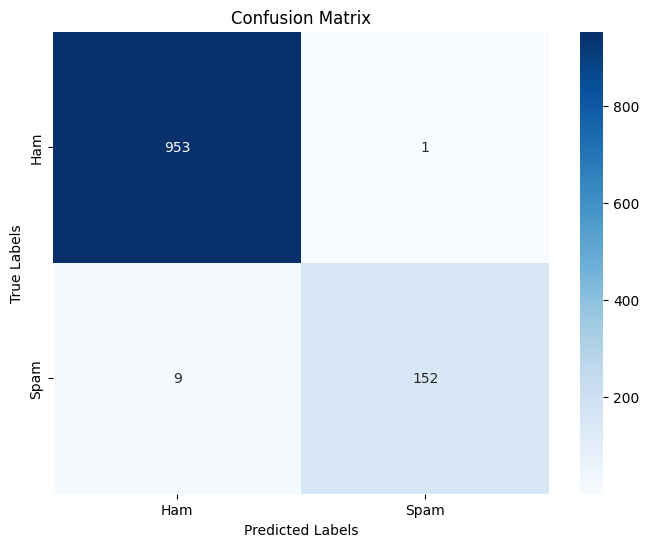

Precision: 0.99
Recall: 0.94
F1-Score: 0.97


In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Ham_Spam_Detection/spam_classifier_lstm.h5')

# Load the model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Ham_Spam_Detection/spam_classifier_lstm.h5')


In [ ]:
# Test on new messages
new_messages = ["Congratulations! You've won a free prize.", "Hi, how are you?"]
new_sequences = tokenizer.texts_to_sequences(new_messages)
new_padded = pad_sequences(new_sequences, maxlen=100)

predictions = (model.predict(new_padded) > 0.5).astype(int).flatten()
print(predictions)  # 1 for spam, 0 for ham


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[1 0]


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


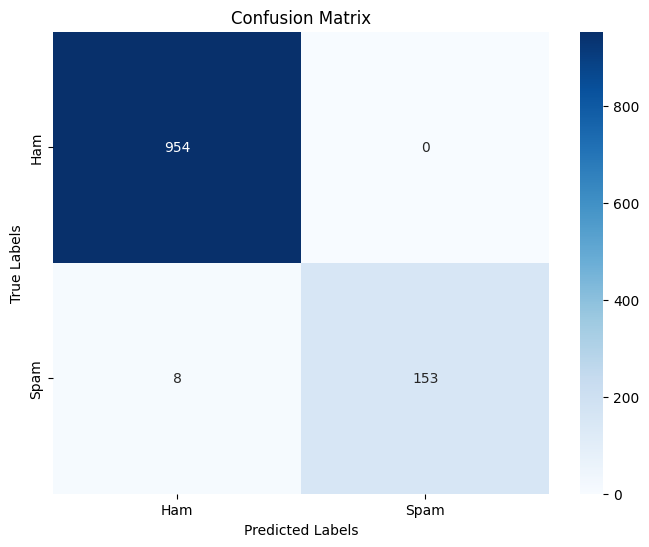

Precision: 1.00
Recall: 0.95
F1-Score: 0.97


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the validation set
val_predictions = (model.predict(X_val) > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [2]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Ham_Spam_Detection/spam_classifier_lstm.h5')


In [19]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=10000)  # Use the top 10,000 most frequent words
tokenizer.fit_on_texts(data['Message'])

# Test on new messages
new_messages = ["Your device has been infected with a virus. Click https://hgxsjaghxkil.com/ejhqsm?=egsh for assistance", "You are the lucky winner of $1 million! Reply WIN to claim your prize.","Earn $5,000/month working from home! No experience needed. Sign up"]
new_sequences = tokenizer.texts_to_sequences(new_messages)
new_padded = pad_sequences(new_sequences, maxlen=100)

predictions = (model.predict(new_padded) > 0.5).astype(int).flatten()
print(predictions)  # 1 for spam, 0 for ham


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
[0 1 0]


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Ham_Spam_Detection/Spam_SMS.csv')

# Encode labels
data['Class'] = data['Class'].map({'ham': 0, 'spam': 1})

X = data['Message']
y = data['Class']

# Text tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=100)


In [12]:


# Define LSTM Model Function
def create_lstm_model(input_dim, input_length):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=128, input_length=input_length),
        LSTM(128, return_sequences=False),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model




In [23]:
def create_Blstm_model(i_dim, i_length):
    from tensorflow.keras.layers import Bidirectional

    model = Sequential([
        Embedding(input_dim=i_dim, output_dim=128, input_length=i_length),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8907 - loss: 0.8373 - val_accuracy: 0.9874 - val_loss: 0.1698
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9937 - loss: 0.1173 - val_accuracy: 0.9910 - val_loss: 0.0648
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9995 - loss: 0.0276 - val_accuracy: 0.9901 - val_loss: 0.0451
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9995 - loss: 0.0171 - val_accuracy: 0.9928 - val_loss: 0.0463
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9999 - loss: 0.0087 - val_accuracy: 0.9874 - val_loss: 0.0634
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


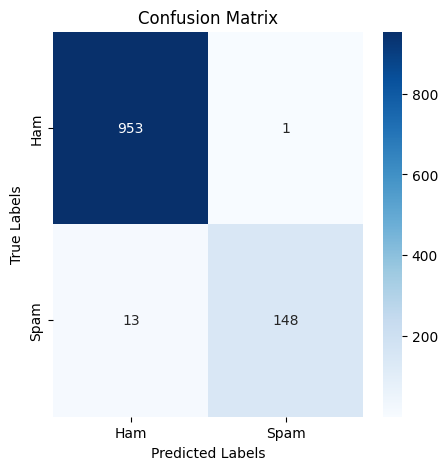

Precision: 0.99
Recall: 0.92
F1-Score: 0.95
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9025 - loss: 0.8597 - val_accuracy: 0.9848 - val_loss: 0.1827
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9926 - loss: 0.1233 - val_accuracy: 0.9883 - val_loss: 0.0703
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9994 - loss: 0.0307 - val_accuracy: 0.9901 - val_loss: 0.0557
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9975 - loss: 0.0225 - val_accuracy: 0.9883 - val_loss: 0.0547
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9997 - loss: 0.0095 - val_accuracy: 0.9910 - val_loss: 0.0528
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


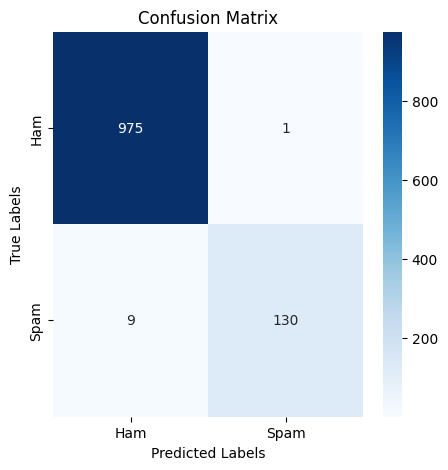

Precision: 0.99
Recall: 0.94
F1-Score: 0.96
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.8901 - loss: 0.8274 - val_accuracy: 0.9892 - val_loss: 0.1623
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9933 - loss: 0.1144 - val_accuracy: 0.9910 - val_loss: 0.0599
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9975 - loss: 0.0318 - val_accuracy: 0.9892 - val_loss: 0.0577
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9995 - loss: 0.0158 - val_accuracy: 0.9928 - val_loss: 0.0371
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9997 - loss: 0.0101 - val_accuracy: 0.9901 - val_loss: 0.0610
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


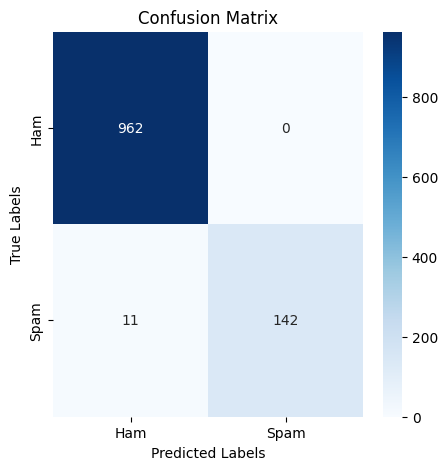

Precision: 1.00
Recall: 0.93
F1-Score: 0.96
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9080 - loss: 0.8322 - val_accuracy: 0.9839 - val_loss: 0.1732
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9930 - loss: 0.1120 - val_accuracy: 0.9883 - val_loss: 0.0647
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9968 - loss: 0.0401 - val_accuracy: 0.9865 - val_loss: 0.0696
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9990 - loss: 0.0194 - val_accuracy: 0.9883 - val_loss: 0.0559
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9998 - loss: 0.0110 - val_accuracy: 0.9865 - val_loss: 0.0703
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


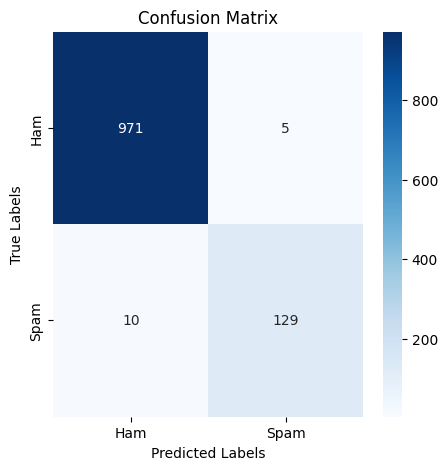

Precision: 0.96
Recall: 0.93
F1-Score: 0.95
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8993 - loss: 0.8323 - val_accuracy: 0.9811 - val_loss: 0.1787
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9952 - loss: 0.1052 - val_accuracy: 0.9794 - val_loss: 0.0963
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9980 - loss: 0.0359 - val_accuracy: 0.9811 - val_loss: 0.0836
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9992 - loss: 0.0157 - val_accuracy: 0.9847 - val_loss: 0.0865
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.9838 - val_loss: 0.0917
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


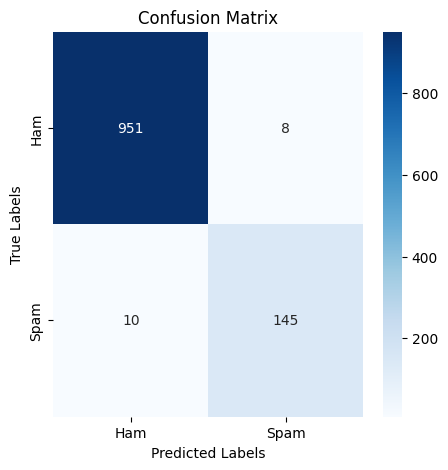

Precision: 0.95
Recall: 0.94
F1-Score: 0.94


In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# K-Fold Cross Validation
for train_index, val_index in kf.split(padded_sequences):
    X_train, X_val = padded_sequences[train_index], padded_sequences[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Create LSTM Model
    model = create_Blstm_model(10000, 100)

    # Train Model
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate Model
    y_val_pred = (model.predict(X_val) > 0.5).astype(int)

    cm = confusion_matrix(y_val, y_val_pred)

    # Plot the heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate Precision, Recall, and F1-Score
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    accuracy_list.append(accuracy_score(y_val, y_val_pred))
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


In [34]:
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1-Score: {np.mean(f1_list):.4f}")

Average Accuracy: 0.9878
Average Precision: 0.9792
Average Recall: 0.9292
Average F1-Score: 0.9534


In [35]:
# Save the model
model.save('/content/drive/MyDrive/Ham_Spam_Detection/spam_classifier_Blstm.h5')

In [43]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Ham_Spam_Detection/spam_classifier_Blstm.h5')

In [44]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=10000)  # Use the top 10,000 most frequent words
tokenizer.fit_on_texts(data['Message'])

# Test on new messages
new_messages = ["You’ve been pre-approved for a credit card with a $10,000 limit. Apply now!"]
new_sequences = tokenizer.texts_to_sequences(new_messages)
new_padded = pad_sequences(new_sequences, maxlen=100)

predictions = (model.predict(new_padded) > 0.5).astype(int).flatten()
print(predictions)  # 1 for spam, 0 for ham

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
[1]
